# Preamble

Most of this workshop is taken from Hadley's [R for Data Science](https://r4ds.had.co.nz/) book. You can find more examples, explanations and exercises there if you want.

## What this workshop covers and does not cover

In this workshop you'll learn principles behind exploratory data analysis and visualization, including tidying and transforming data to answer questions you might want to ask. What you will *not* learn is how to make specific plots.

# Package prerequisites

Packages that required in this workshop are **tidyverse**, which includes the packages **ggplot2**, **dplyr**, **purrr**, and others, **gridExtra** which helps with arranging plots next to each other, and **ggrepel** which helps with plot labels.

In [1]:
library(tidyverse)
library(gridExtra)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.0  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.2       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
Warning message:
“package ‘tibble’ was built under R version 3.5.2”Warning message:
“package ‘purrr’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”Warning message:
“package ‘stringr’ was built under R version 3.5.2”Warning message:
“package ‘forcats’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



If you get an error message “there is no package called ‘xyz’” then you need to install the packages first. (They should have been preloaded on your notebooks but if not it's ok, it won't take long.)

In [2]:
#install.packages('tidyverse')
#install.packages('gridExtra')
#install.packages('ggrepel')

# Visualizing Data

Core feature of exploratory data analysis is asking questions about data and searching for answers by visualizing and modeling data.

 * **Variable:** quantity, quality, property that can be measured.
 * **Value:** State of variable when measured.
 * **Observation:** Set of measurements made under similar conditions
 * **Tabular data:** Set of values, each associated with a variable and an observation.
 
Most questions around what type of variation or covariation occurs between variables.

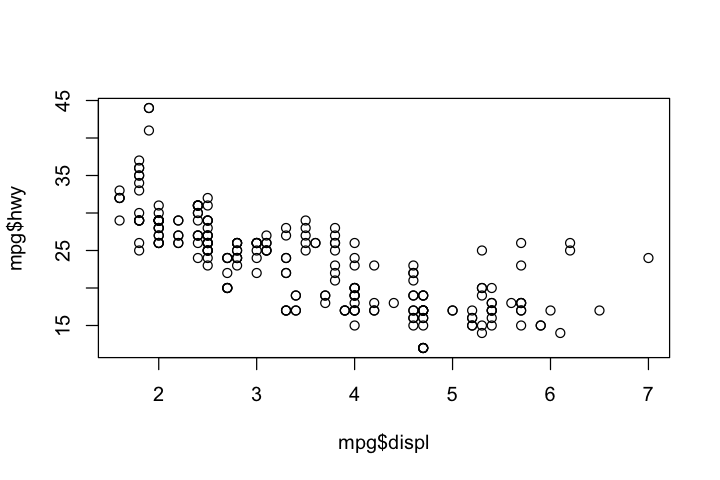

In [3]:
options(repr.plot.width=6, repr.plot.height=4)
# regular plot functions in R
plot(x=mpg$displ,y=mpg$hwy)

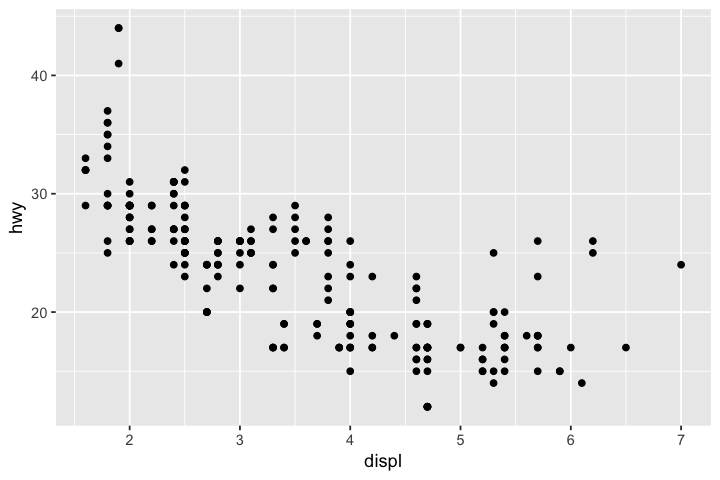

In [4]:
# ggplot!
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy))

Basic syntax of ggplot:
```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


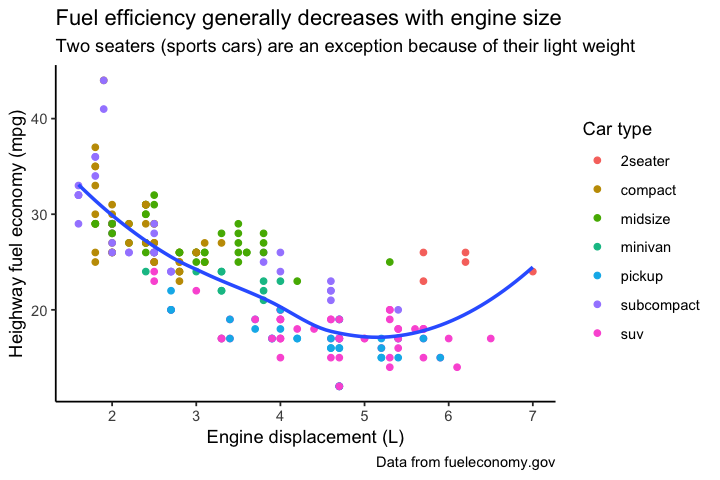

In [5]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(x="Engine displacement (L)",y="Heighway fuel economy (mpg)",
    title = "Fuel efficiency generally decreases with engine size",
    caption = "Data from fueleconomy.gov",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    colour = "Car type"
  ) + theme_classic()

## But first...

# Tidying Data

Tidy data:
 * Each variable is its own column
 * Each observation is its own row
 * Each value is in a single cell

Consider the following tables:

In [6]:
table1 <- data.frame(makemodel=c("audi a4","audi a4","chevrolet corvette","chevrolet corvette","honda civic","honda civic"),
                    year=rep(c(1999,2008),3),
                    cty=c(18,21,15,15,24,25),
                    hwy=c(29,30,23,25,32,36))
table1

makemodel,year,cty,hwy
audi a4,1999,18,29
audi a4,2008,21,30
chevrolet corvette,1999,15,23
chevrolet corvette,2008,15,25
honda civic,1999,24,32
honda civic,2008,25,36


In [7]:
table2 <- data.frame(makemodel=c(rep("audi a4",4),rep("chevrolet corvette",4),rep("honda civic",4)),
                    year=rep(c(1999,1999,2008,2008),3),
                    type=rep(c("cty","hwy"),6),
                     mileage=c(18,29,21,30,15,23,15,25,24,32,25,36))
table2

makemodel,year,type,mileage
audi a4,1999,cty,18
audi a4,1999,hwy,29
audi a4,2008,cty,21
audi a4,2008,hwy,30
chevrolet corvette,1999,cty,15
chevrolet corvette,1999,hwy,23
chevrolet corvette,2008,cty,15
chevrolet corvette,2008,hwy,25
honda civic,1999,cty,24
honda civic,1999,hwy,32


In [8]:
table3 <- data.frame(makemodel=c("audi a4","audi a4","chevrolet corvette","chevrolet corvette","honda civic","honda civic"),
                     year=rep(c(1999,2008),3),
                    mileages=c('18/29','21/30','15/23','15/25','24/32','25/36'))
table3

makemodel,year,mileages
audi a4,1999,18/29
audi a4,2008,21/30
chevrolet corvette,1999,15/23
chevrolet corvette,2008,15/25
honda civic,1999,24/32
honda civic,2008,25/36


In [9]:
table4a <- data.frame(makemodel=c("audi a4","chevrolet corvette","honda civic"),`1999`=c(18,15,24),'2000'=c(21,15,25),check.names=FALSE)
table4b <- data.frame(makemodel=c("audi a4","chevrolet corvette","honda civic"),`1999`=c(29,23,32),'2000'=c(30,25,36),check.names=FALSE)
table4a
table4b

makemodel,1999,2000
audi a4,18,21
chevrolet corvette,15,15
honda civic,24,25


makemodel,1999,2000
audi a4,29,30
chevrolet corvette,23,25
honda civic,32,36


## Gathering

`table4a` column names `1999` and `2008` represent values of `year` variable. Each row represents 2 observations, not 1. Need to gather columns into new pair of variables.

Parameters:
 * Set of columns that represent values, not variables.
 * `key`: name of variable whose values are currently column names.
 * `value`: name of variable whose values are currently spread out across multiple columns.

In [10]:
tidy4a <- gather(table4a,`1999`,`2000`,key="year",value="cty")
tidy4a

makemodel,year,cty
audi a4,1999,18
chevrolet corvette,1999,15
honda civic,1999,24
audi a4,2000,21
chevrolet corvette,2000,15
honda civic,2000,25


In [11]:
tidy4b <- gather(table4b, `1999`, `2000`, key = "year", value = "hwy")
tidy4b

makemodel,year,hwy
audi a4,1999,29
chevrolet corvette,1999,23
honda civic,1999,32
audi a4,2000,30
chevrolet corvette,2000,25
honda civic,2000,36


Merge tables using `left_join()` (many other types of table joins as well)

In [12]:
left_join(tidy4a,tidy4b)

Joining, by = c("makemodel", "year")


makemodel,year,cty,hwy
audi a4,1999,18,29
chevrolet corvette,1999,15,23
honda civic,1999,24,32
audi a4,2000,21,30
chevrolet corvette,2000,15,25
honda civic,2000,25,36


## Spreading

`table2` has each observation in two rows. Need to spread observations across columns with appropriate variable names instead.

Parameters:
 * `key`: Column that contains variable names.
 * `value`: Column that contains values for each variable.

In [13]:
spread(table2, key=type,value=mileage)

makemodel,year,cty,hwy
audi a4,1999,18,29
audi a4,2008,21,30
chevrolet corvette,1999,15,23
chevrolet corvette,2008,15,25
honda civic,1999,24,32
honda civic,2008,25,36


## Separating

`table3` has `mileages` column that actually contains two variables (`cty` and `hwy`). Need to separate into two columns.

Parameters:
 * column/variable that needs to be separated.
 * `into`: columns to split into
 * `sep`: separator value. Can be regexp or positions to split at. If not provided then splits at non-alphanumeric characters.

In [14]:
separate(table3, mileages, into = c("cty", "hwy"), sep="/")

makemodel,year,cty,hwy
audi a4,1999,18,29
audi a4,2008,21,30
chevrolet corvette,1999,15,23
chevrolet corvette,2008,15,25
honda civic,1999,24,32
honda civic,2008,25,36


In [15]:
sep <- separate(table3, makemodel, into = c("make", "model"), sep = ' ')
sep

make,model,year,mileages
audi,a4,1999,18/29
audi,a4,2008,21/30
chevrolet,corvette,1999,15/23
chevrolet,corvette,2008,15/25
honda,civic,1999,24/32
honda,civic,2008,25/36


## Uniting

Now `sep` has `make` and `model` columns that can be combined into a single column. In other words, we want to unite them.

Parameters:
 * Name of united column/variable
 * Names of columns/variables to be united
 * `sep`: Separator value. Default is '_'


In [16]:
unite(sep, new, make, model)

new,year,mileages
audi_a4,1999,18/29
audi_a4,2008,21/30
chevrolet_corvette,1999,15/23
chevrolet_corvette,2008,15/25
honda_civic,1999,24/32
honda_civic,2008,25/36


In [17]:
unite(sep, makemodel, make, model, sep=' ')

makemodel,year,mileages
audi a4,1999,18/29
audi a4,2008,21/30
chevrolet corvette,1999,15/23
chevrolet corvette,2008,15/25
honda civic,1999,24/32
honda civic,2008,25/36


## Piping

**dplyr** from **tidyverse** contains the 'pipe' (`%>%`) which allows you to combine multiple operations, directly taking output from a funtion as input to the next. Can save time and memory as well as make code easier to read. Can think of it this way: `x %>% f(y)` becomes `f(x,y)`, and `x %>% f(y) %>% g(z)` becomes `g(f(x,y),z)`, etc.

In [18]:
unite(sep, makemodel, make, model, sep=' ') %>%
    separate(mileages, into=c("cty","hwy"))

makemodel,year,cty,hwy
audi a4,1999,18,29
audi a4,2008,21,30
chevrolet corvette,1999,15,23
chevrolet corvette,2008,15,25
honda civic,1999,24,32
honda civic,2008,25,36


## Not all data should be tidy

Matrices, phylogenetic trees (although `ggtree` and `treeio` have tidy representations that help with annotating trees), etc.

# Transforming (Tidy) Data

 * `filter()` to pick observations (rows) by their values
 * `arrange()` to reorder rows, default is by ascending value
 * `select()` to pick variables (columns) by their names
 * `mutate()` to create new variables with functions of existing variables
 * `summarise()` to collapes many values down to a single summary
 * `group_by()` to set up functions to operate on groups rather than the whole data set
 * `%>%` propagates the output from a function as input to another. eg: x %>% f(y) becomes f(x,y), and x %>% f(y) %>% g(z) becomes g(f(x,y),z).
 
All functions have similar structure:
 1. First argument is data frame
 2. Next arguments describe what to do with data frame using variable names
 3. Result is new data frame
 
Will be working with data frame **mpg** for rest of workshop which comes with the **tidyverse** library.

In [19]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## `filter()` rows/observations

As name suggests filters out rows. First argument is name of data frame, next arguments are expressions that filter the data frame.

In [20]:
# filter out 2seater cars
no_2seaters <- filter(mpg, class != "2seater")
head(no_2seaters)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [21]:
# filter out audis, chevys, and hondas
mpg %>% filter(!manufacturer %in% c("audi","chevrolet","honda")) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan
dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan


## `arrange()` rows/observations

Changes order of rows. First argument is name of data frame, next arguments are column names (or more complicated expressions) to order by. Default column ordering is by ascending order, can use `desc()` to do descending order. Missing values get sorted at the end regardless of what column ordering is chosen.

In [22]:
# arrange/reorder mpg by class
arrange(mpg, class) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [23]:
# arrange/reorder data frame with 2seaters filtered out by class
# 2seaters does not appear which is as it should be
arrange(no_2seaters, class) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


What kinds of cars have the best highway and city gas mileage?

In [24]:
# arrange mpg so that first hwy mileage is by descending order, then cty mileage is by descending order
arrange(mpg, desc(hwy), desc(cty)) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact


In [25]:
df <- data.frame(x=c(5,2,NA,6))
# arrange df by ascending order, NA will be at bottom
arrange(df, x)
# arrange df by descending order, NA will be at bottom
arrange(df, desc(x))
# arrange df by F/T, where F comes first. NA goes to the top and the rest of the values are unsorted
# because they are all T for !is.na(x)
arrange(df,!is.na(x))

x
2
5
6
NA


x
6
5
2
NA


x
NA
5
2
6


## `select()` columns/variables

Selects columns, which can be useful when you have hundreds or thousands of variables in order to narrow down to what variables you're actually interested in. First argument is name of data frame, subsequent arguments are columns to select. Can use `a:b` to select all columns between `a` and `b`, or use `-a` to select all columns *except* a.

In [26]:
# select manufacturer, model, year, cty, hwy
select(mpg, manufacturer, model, year, cty, hwy) %>% head

manufacturer,model,year,cty,hwy
audi,a4,1999,18,29
audi,a4,1999,21,29
audi,a4,2008,20,31
audi,a4,2008,21,30
audi,a4,1999,16,26
audi,a4,1999,18,26


In [27]:
# select all columns model thru hwy
select(mpg, model:hwy) %>% head

model,displ,year,cyl,trans,drv,cty,hwy
a4,1.8,1999,4,auto(l5),f,18,29
a4,1.8,1999,4,manual(m5),f,21,29
a4,2.0,2008,4,manual(m6),f,20,31
a4,2.0,2008,4,auto(av),f,21,30
a4,2.8,1999,6,auto(l5),f,16,26
a4,2.8,1999,6,manual(m5),f,18,26


In [28]:
# select all columns except cyl thru drv and class
select(mpg, -(cyl:drv), -class) %>% head

manufacturer,model,displ,year,cty,hwy,fl
audi,a4,1.8,1999,18,29,p
audi,a4,1.8,1999,21,29,p
audi,a4,2.0,2008,20,31,p
audi,a4,2.0,2008,21,30,p
audi,a4,2.8,1999,16,26,p
audi,a4,2.8,1999,18,26,p


## `mutate()` to add new variables or `transmute()` to keep only new variables

Adds new columns that are functions of existing columns. First argument is name of data frame, next arguments are of the form `new_column_name = f(existing columns)`.

In [29]:
# add a new column that takes average mileage between city and highway
mutate(mpg, avg_mileage = (cty+hwy)/2) %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0


In [30]:
# keep only average mileage between city and highway
transmute(mpg,avg_mileage=(cty+hwy)/2) %>% head

avg_mileage
23.5
25.0
25.5
25.5
21.0
22.0


## `summarise()` and `group_by()` for grouped summaries

`summarise()` collapses a data frame into a single row, and `group_by()` changes analysis from entire data frame into individual groups.

In [31]:
# get average mileage grouped by engine displacement
m <- mutate(mpg, avg_mileage=(cty+hwy)/2)
m %>% group_by(cyl) %>%
    summarise(avg=mean(avg_mileage)) %>%
    head

cyl,avg
4,24.90741
5,24.62500
6,19.51899
8,15.10000


In [32]:
group_by(m, drv) %>%
    summarise(avg=mean(avg_mileage))

drv,avg
4,16.75243
f,24.06604
r,17.54000


In [33]:
group_by(m, drv, cyl) %>% summarise(avg=mean(avg_mileage)) %>% arrange(desc(avg))

drv,cyl,avg
f,4,26.26724
f,5,24.62500
4,4,21.47826
r,6,21.25000
f,6,21.12791
f,8,20.50000
4,6,17.14062
r,8,16.83333
4,8,14.22917


# Back to Visualizing Data

Basic syntax of ggplot:
```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

In [34]:
head(mpg) # automatically loaded when you load tidyverse

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


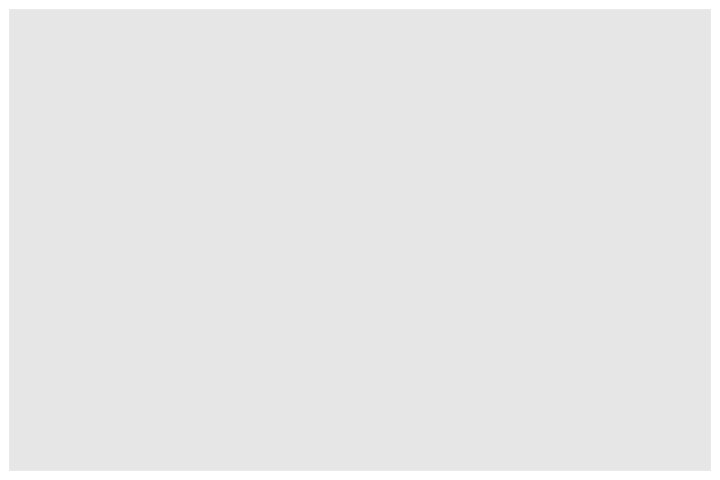

In [35]:
ggplot(mpg)

ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: x, y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(ob

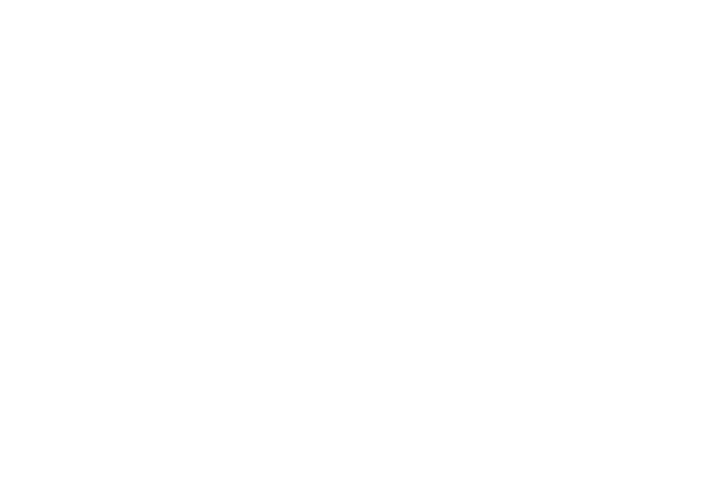

In [36]:
ggplot(mpg) + geom_point()

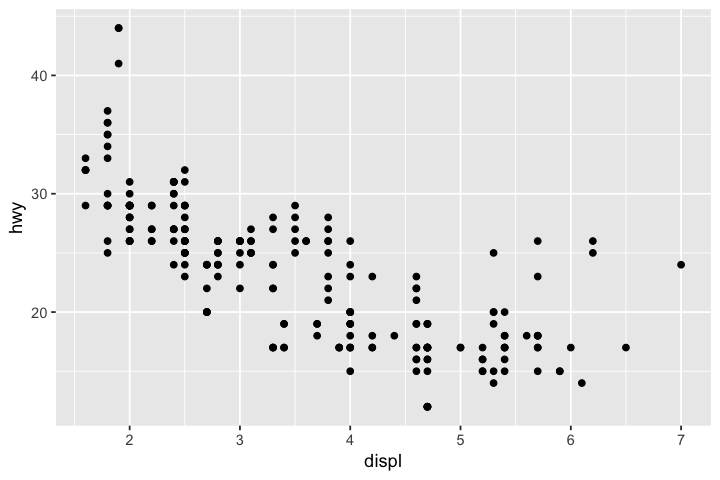

In [37]:
ggplot(mpg) + geom_point(mapping=aes(x=displ,y=hwy))

## `<MAPPINGS>`

Visual property of objects in plot, i.e. size, shape, color. Can display points from other variables (in this case class) in different ways by changing value of aesthetic properties. These are known as **levels**, which is done in order to distinguish aesthetic values from data values.

In [38]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Using alpha for a discrete variable is not advised.”

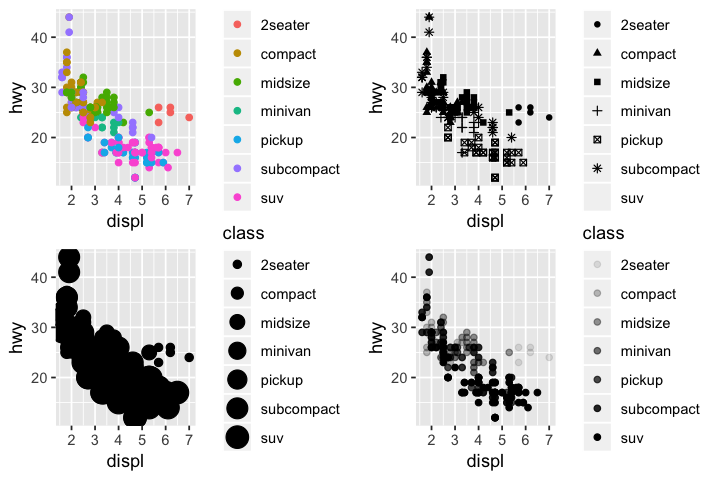

In [39]:
p1 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color=class))
p2 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,shape=class))
p3 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,size=class))
p4 <- ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,alpha=class))
grid.arrange(p1,p2,p3,p4,nrow=2)

### Levels

**ggplot2** automatically assigns a unique level of an aesthetic to a unique value of the variable. This process is known as scaling. It will also automatically select a scale to use with the aesthetic (i.e. continuous or discrete) as well as add a legend explaining the mapping between levels and values. That's why in the size mapping there's no shape for suv, and why the following two pieces of code do different things:

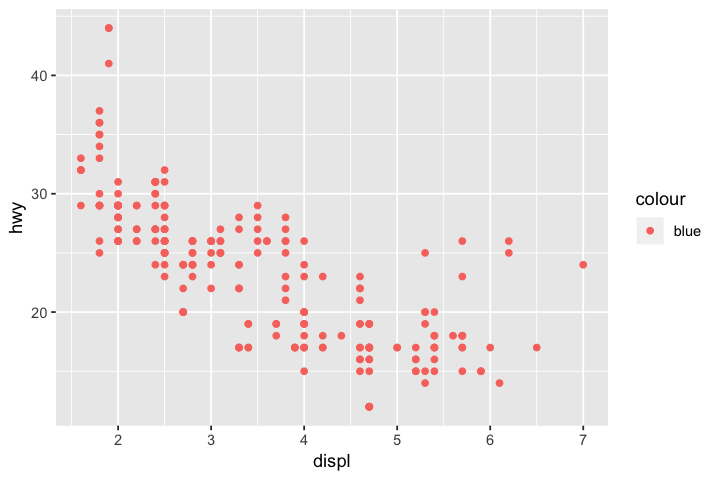

In [40]:
# for color property, all data points were assigned to 'blue', therefore ggplot2 assigns a single level to all of the
# points, which is red
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color='blue'))

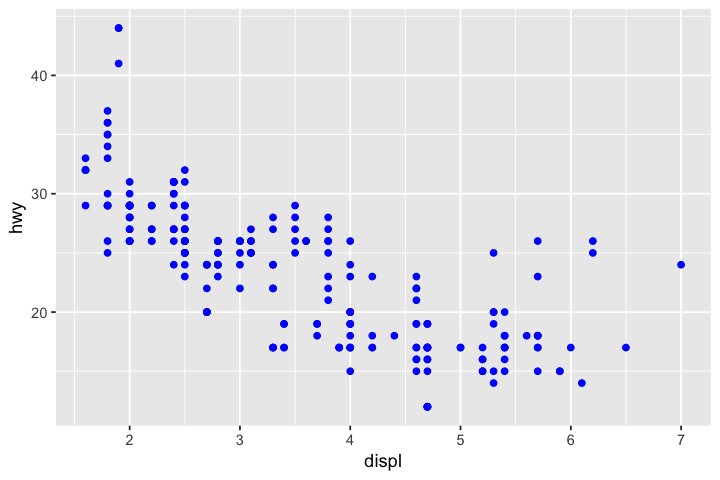

In [41]:
# here color is placed outside aesthetic mapping, so ggplot2 understands that we want color of points to be blue
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy),color='blue')

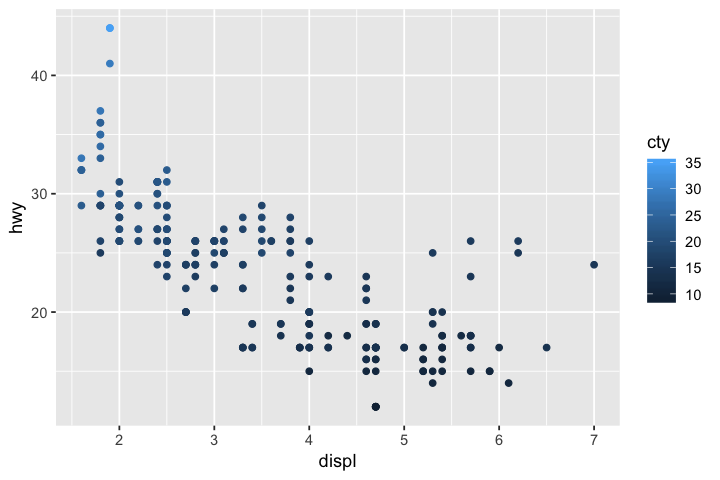

In [42]:
# cty is a continuous variable, so when mapped to color we get a gradient with bins instead
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,color=cty))

### Continuous vs discrete scales

Generally continuous scales get chosen for numerical data and discrete scales are chosen for categorical data. If your data is numeric but in discrete categories you may have to use `as.factor()` in order to get proper levels.

ERROR while rich displaying an object: Error: A continuous variable can not be mapped to shape

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

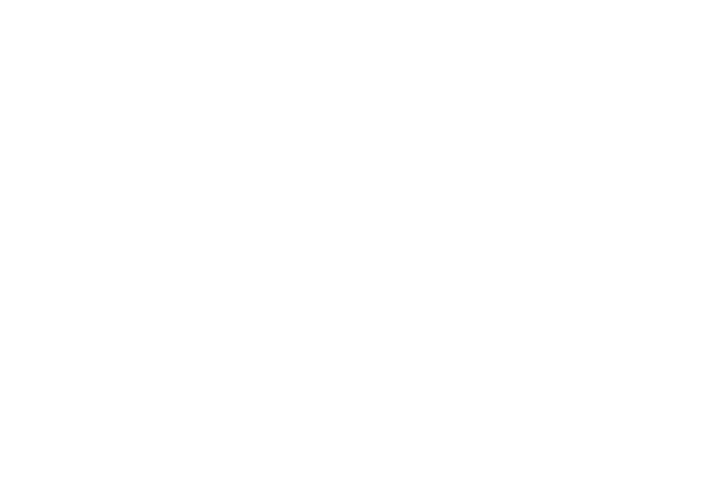

In [43]:
# if we try to map cyl to shape we get an error because shape is only for discrete variables
# even though we only have cyl=4,5,6 or 8
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,shape=cyl))

In [44]:
# will transform into categorical variable with levels
as.factor(mpg$cyl)

[1] 4 4 4 4 6 6 6 4 4 4 4 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 4 6 6 6
 [38] 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 [75] 8 8 8 6 6 6 6 8 8 6 6 8 8 8 8 8 6 6 6 6 8 8 8 8 8 4 4 4 4 4 4 4 4 4 4 4 4
[112] 4 6 6 6 4 4 4 4 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 6 6 8 8 4 4 4 4 6 6 6
[149] 6 6 6 6 6 8 6 6 6 6 8 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 8 4 4 4 4 6 6
[186] 6 4 4 4 4 6 6 6 4 4 4 4 4 8 8 4 4 4 6 6 6 6 4 4 4 4 6 4 4 4 4 4 5 5 6 6 4
[223] 4 4 4 5 5 4 4 4 4 6 6 6
Levels: 4 5 6 8

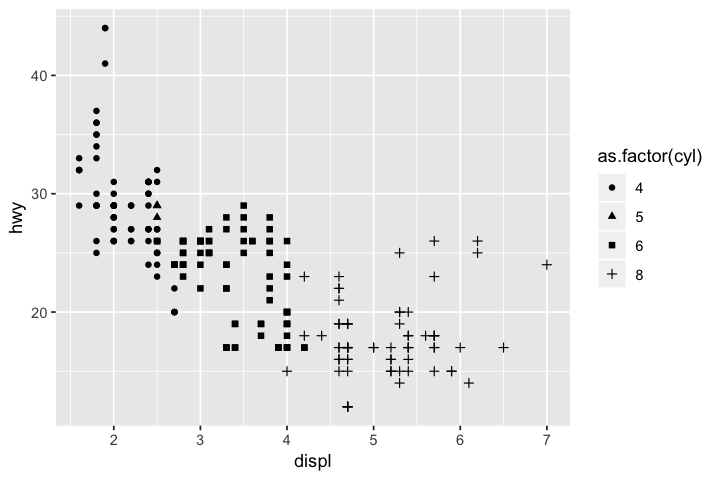

In [45]:
# all is well when we use as.factor()
ggplot(data=mpg) + geom_point(mapping=aes(x=displ,y=hwy,shape=as.factor(cyl)))

Note that this means x and y are aesthetic mappings as well. In fact without them you will get an error.

ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: x, y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(ob

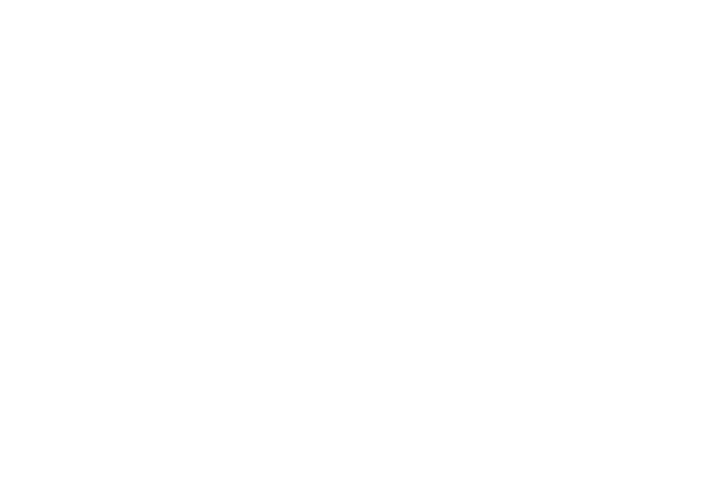

In [46]:
ggplot(data=mpg) + geom_point()

## `<GEOM_FUNCTION>`

```
ggplot(data=<DATA>) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>)
```

**geom** geometrical object plot uses to represent data. Bar charts use bar geoms, line charts use line geoms, boxplots, etc. Scatterplots use point geoms. Full list of geoms provided with **ggplot2** can be seen in [ggplot2 reference](https://ggplot2.tidyverse.org/reference/#section-layer-geoms). Also exist other geoms created by [other packages](http://www.ggplot2-exts.org/gallery/).

Every geom function in ggplot2 takes a `mapping` argument with specific aesthetic mappings that are possible. Not every aesthetic will work with every geom. For example, can set shape of a point, but not shape of a line. However, can set linetype of a line.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


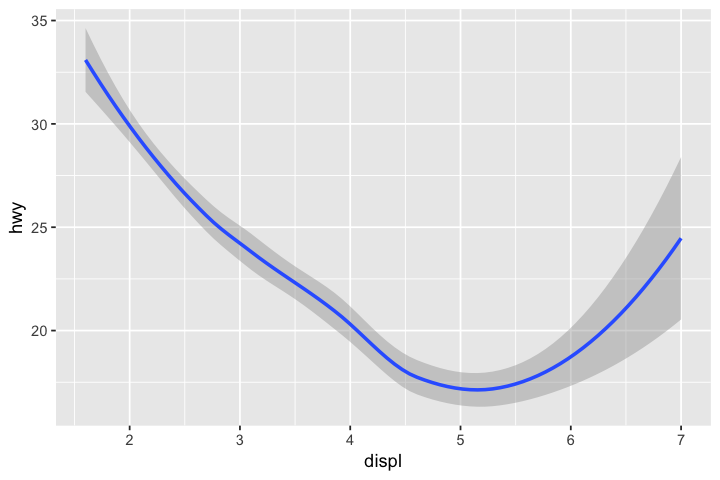

In [47]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


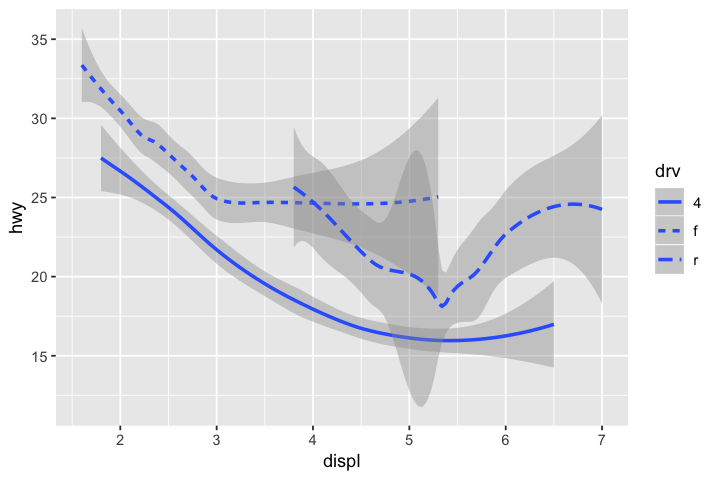

In [48]:
# data has been separated into three lines based on their drivetrain: 4 (4wd), f (front), r (rear)
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

Can display multiple geoms on same plot just by adding them

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


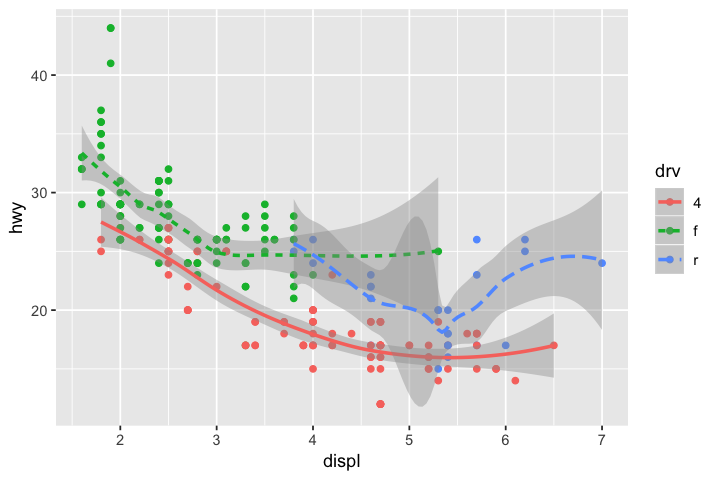

In [49]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=drv)) +
  geom_smooth(mapping = aes(x = displ, y = hwy, color=drv, linetype=drv))

Geoms like `geom_smooth()` use single geometric object to display multiple rows of data. If you don't necessarily want to add other distinguishing features to the geom like color, can use `group` aesthetic (for a categorical variable) to draw multiple objects.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


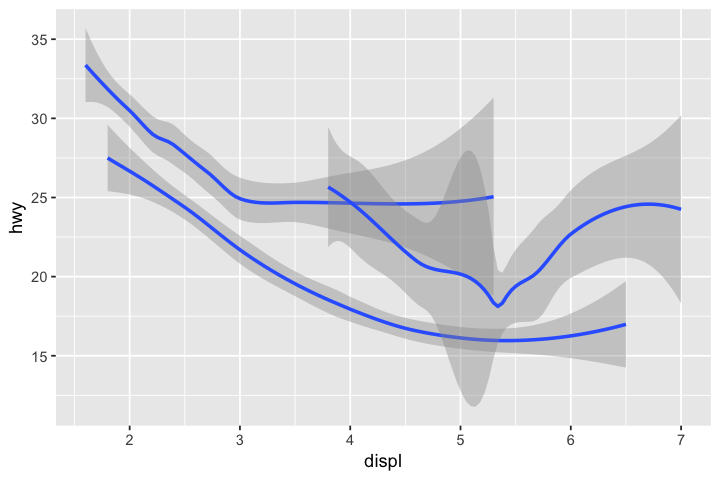

In [50]:
ggplot(data=mpg) +
    geom_smooth(mapping=aes(x=displ,y=hwy,group=drv))

### Global mappings vs local mappings

`ggplot()` function contains *global* mapping, while each geom has a local mapping

 * `lm` from **stats** for linear models (you can also fit other models)

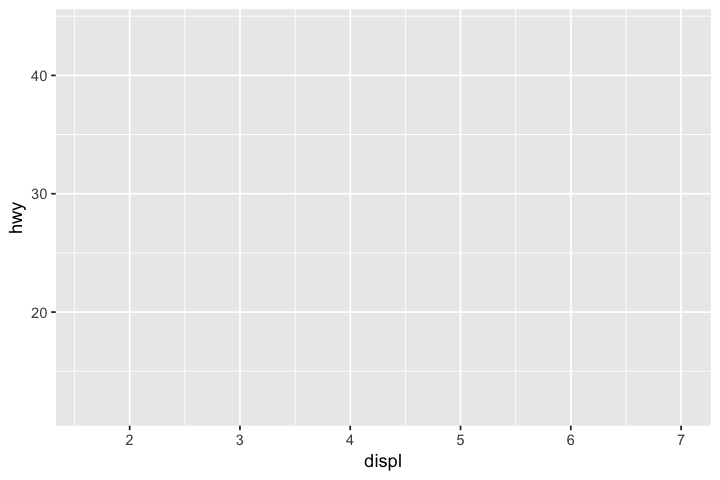

In [51]:
# global mapping of displ and hwy creates x and yaxis
ggplot(data=mpg, mapping=aes(x=displ,y=hwy))

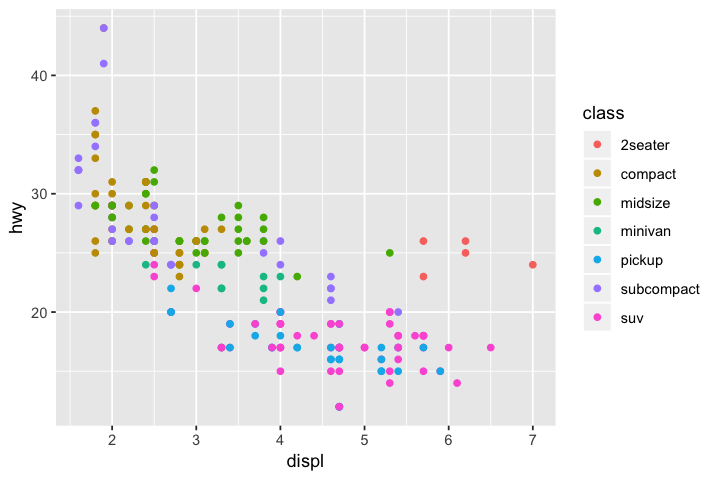

In [52]:
# mapping color to class for point geom while using global x and y mappings
ggplot(data=mpg, mapping=aes(x=displ,y=hwy)) + geom_point(mapping=aes(color=class))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


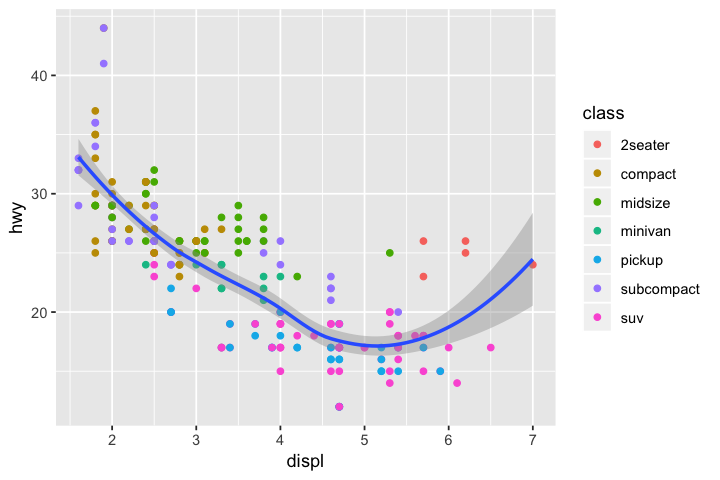

In [53]:
# geom_smooth doesn't need any mapping arguments if using global
ggplot(data=mpg, mapping=aes(x=displ,y=hwy)) +
    geom_point(mapping=aes(color=class))+
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


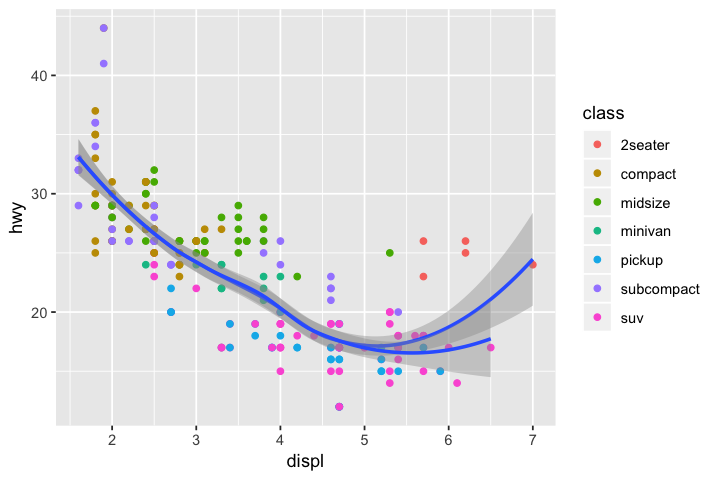

In [54]:
# second geom_smooth uses same x and y mapping
# but mapping comes from no_2seaters data (from Transform section) instead
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth() +
  geom_smooth(data = no_2seaters)

## More syntax

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

## Facets

Subplots displaying one subset of data.

 * `facet_wrap()` for a single variable.
 * `facet_grid()` for along 2 variables.

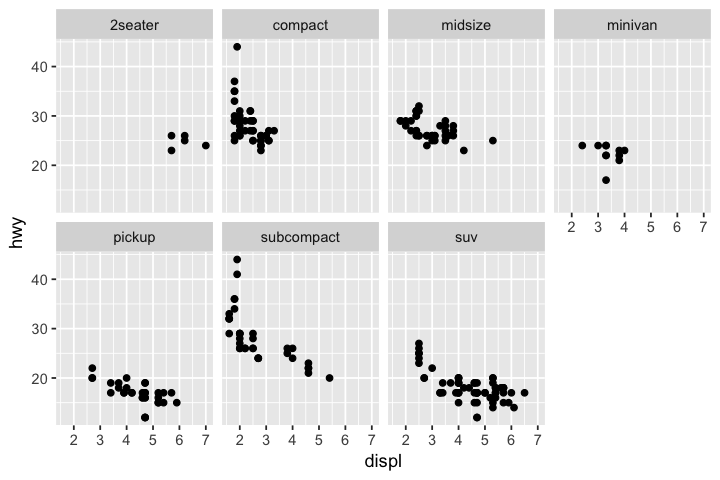

In [55]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class, nrow=2)

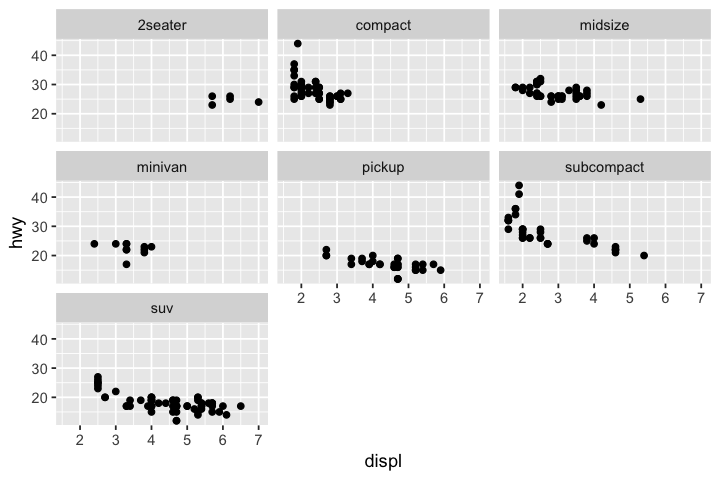

In [56]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class, nrow=3)

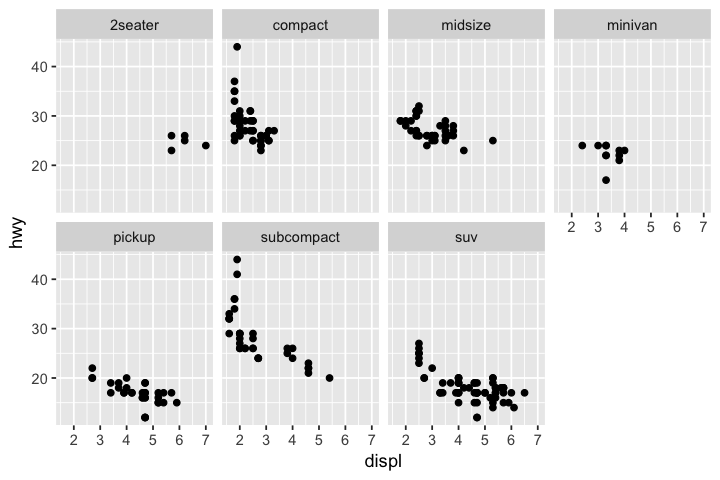

In [57]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class, ncol=4)

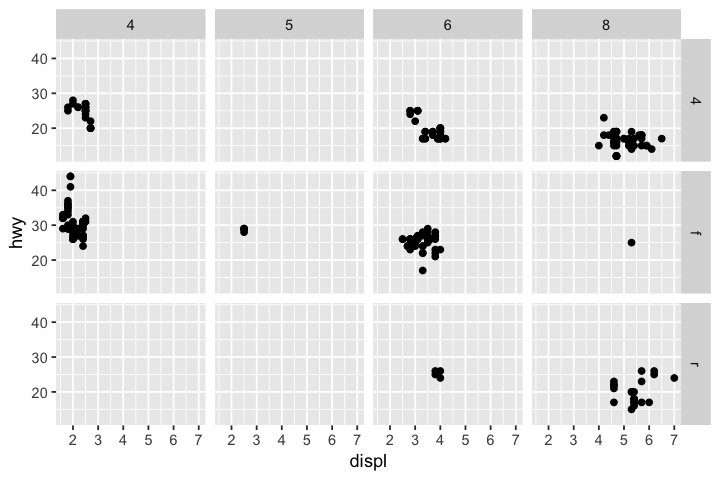

In [58]:
# some facets are empty because no observations have those combos
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

## Stats

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

Algorithm used to calculate new values for a graph. Each geom object has a default stat, and each stat has a default geom. Geoms like `geom_point()` will leave data as is, known as `stat_identity()`. Graphs like bar charts and histograms will bin your data and compute bin counts, known as `stat_count()`. Can see full list of stats at [ggplot2 reference](https://ggplot2.tidyverse.org/reference/) under both Layer: geoms and Layer: stats.

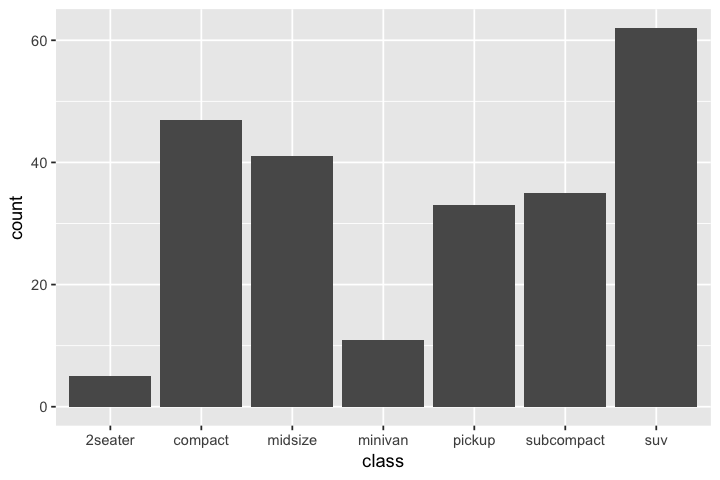

In [59]:
ggplot(data=mpg) +
    geom_bar(mapping=aes(x=class))

Since each stat comes with a default geom, can use stat to create geoms on plots as well.

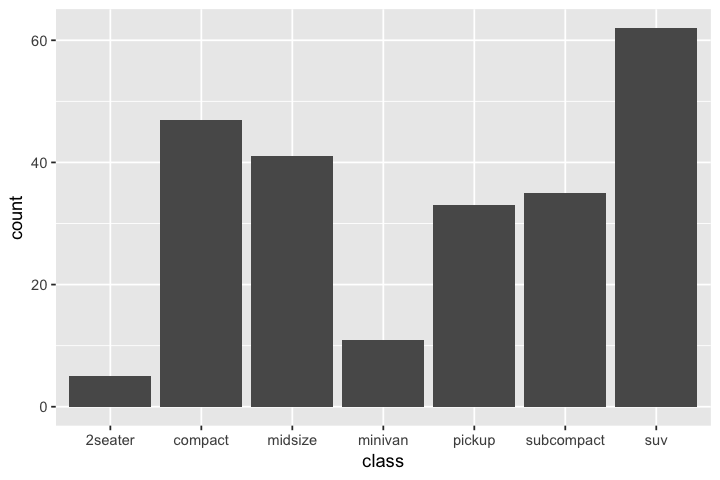

In [60]:
ggplot(data=mpg) +
    stat_count(mapping=aes(x=class))

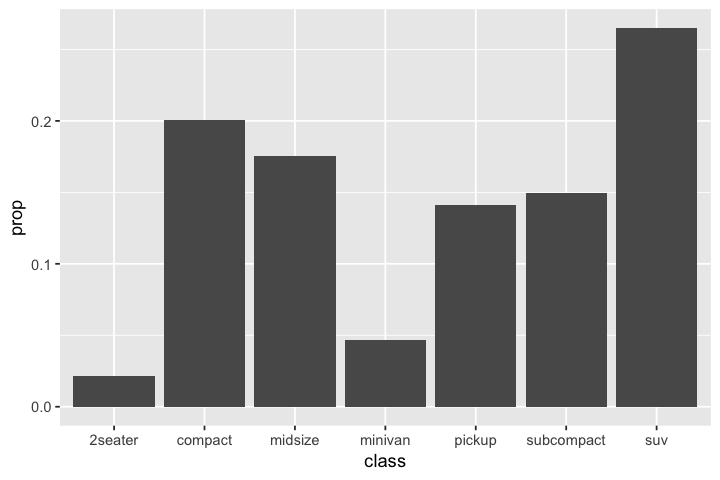

In [61]:
# because stat_count() computes count and prop, can use those as variables for mapping as well
ggplot(data=mpg) + geom_bar(mapping=aes(x=class, y=..prop..,group=1))

No summary function supplied, defaulting to `mean_se()


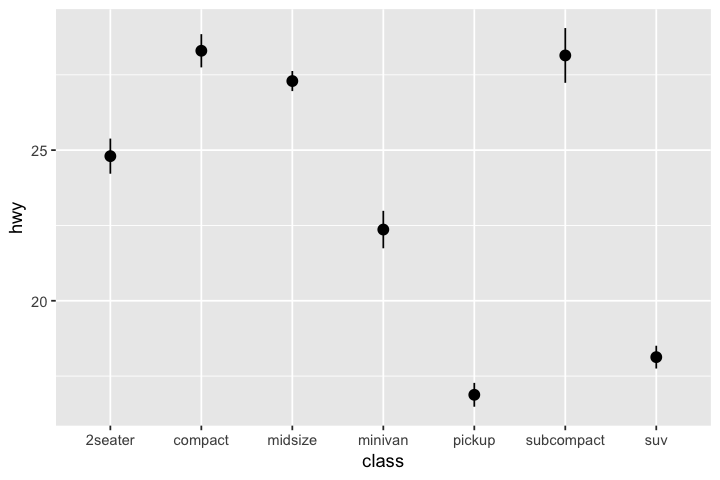

In [62]:
# stat_summary is associated with geom_pointrange
# default is to compute mean and standard error
ggplot(data = mpg) + 
  stat_summary(mapping = aes(x=class,y=hwy))

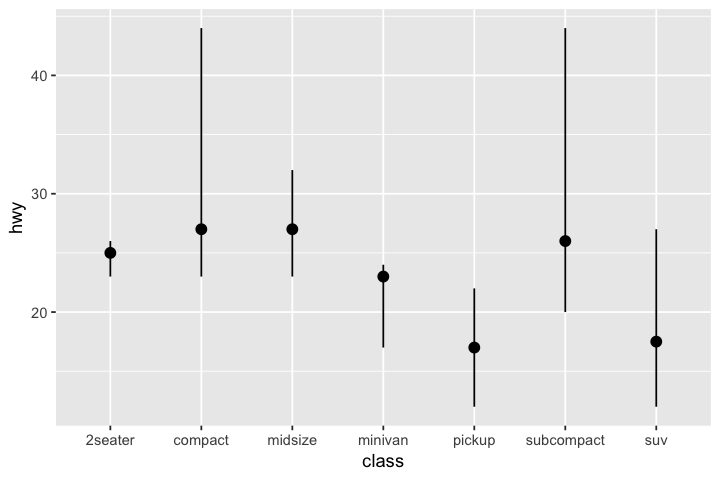

In [63]:
# can change stat_summary to compute median and min/max instead
ggplot(data = mpg) +
  stat_summary(
    mapping = aes(x = class, y = hwy),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

## Position adjustments

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

Each geom also comes with a default **position adjustment** specified by `position` argument. For geoms like `geom_point()` it is "identity" which is position as is.

Specifically for bar charts, have fill aesthetic. If fill aesthetic gets mapped to another variable, bars are automatically stacked under the "stack" position. Can see [list of positions](https://ggplot2.tidyverse.org/reference/#section-layer-position-adjustment) at ggplot2 reference.

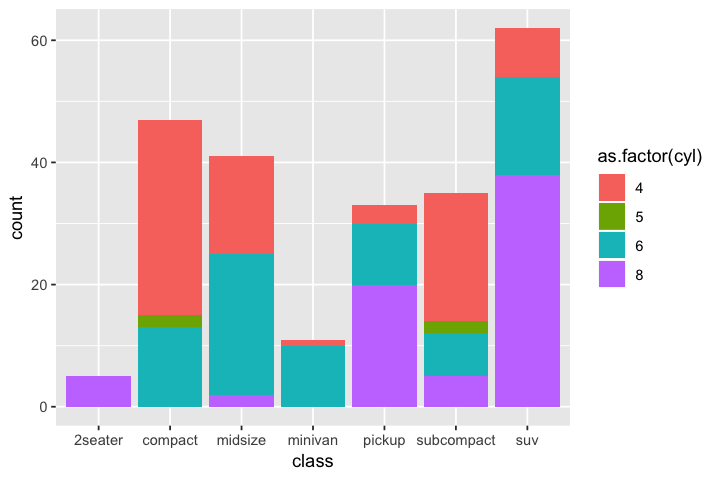

In [64]:
p1 <- ggplot(data = mpg, mapping=aes(x=class,fill=as.factor(cyl)))
p1 + geom_bar()

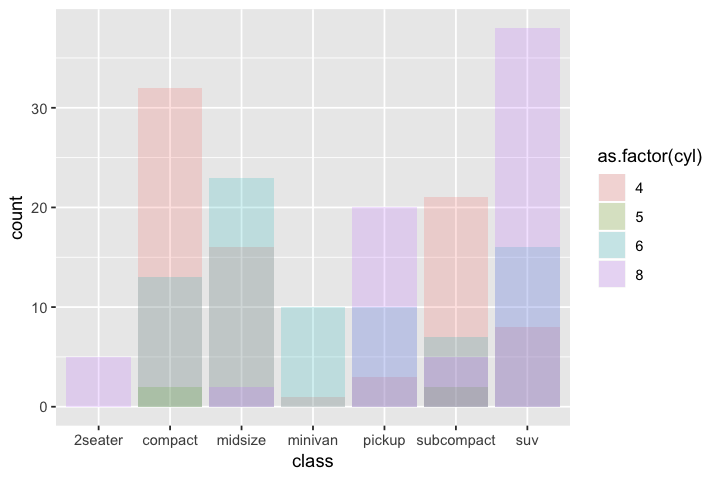

In [65]:
# position = identity will place each object exactly where it falls in context of graph.
# Not useful for bar charts, better for scatterplots.
p1 + geom_bar(position="identity",alpha=0.2)

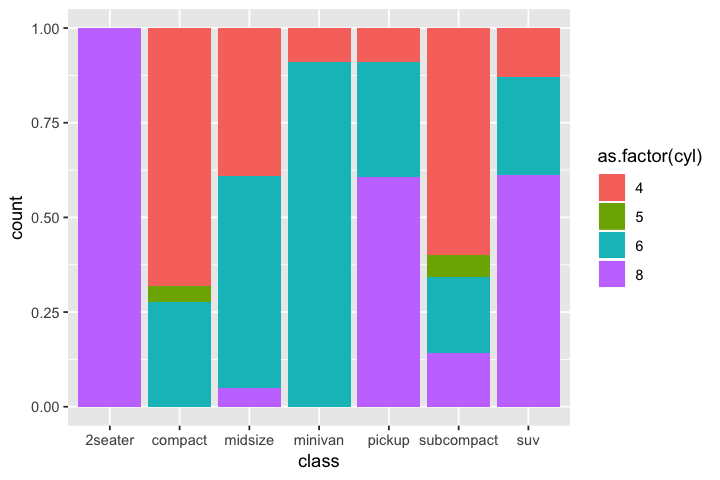

In [66]:
# position = fill will make bars same height
p1 + geom_bar(position="fill")

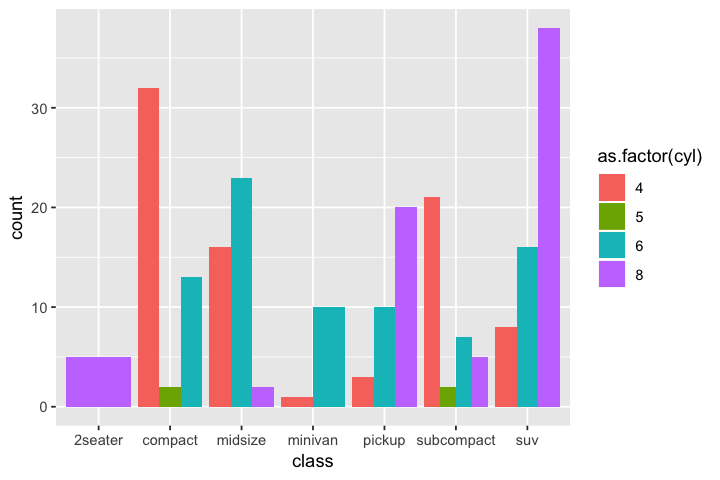

In [67]:
# position = "dodge" places objects directly beside one another. Easier to compare individual values.
p1 + geom_bar(position="dodge")

For `geom_point` one possible position is "jitter", which will add a small amount of random noise to each point. This spreads points out so that it's unlikely for points to overlap and therefore get plotted over each other. For example it's possible that majority of points are actually one combination of `hwy` and `displ` but they all get plotted at the exact same point so you can't tell. For very large datasets can help prevent overplotting to better see where mass of plot is or trends.

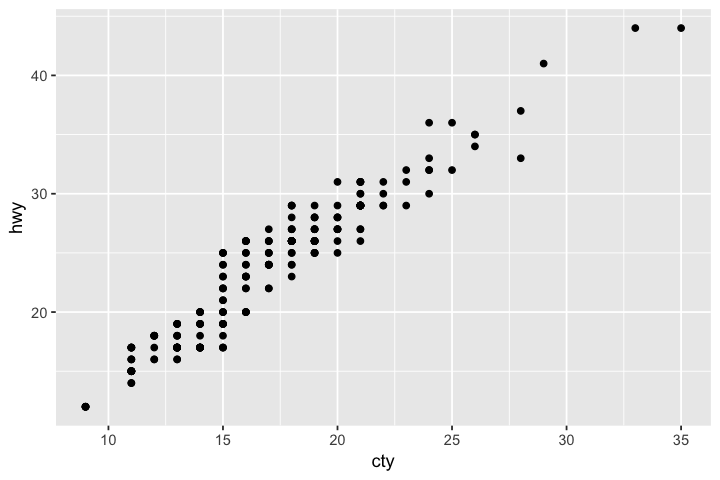

In [68]:
# seems quite uniform which suggests multiple observations with same value of cty/hwy
# creating overlapping points
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point()

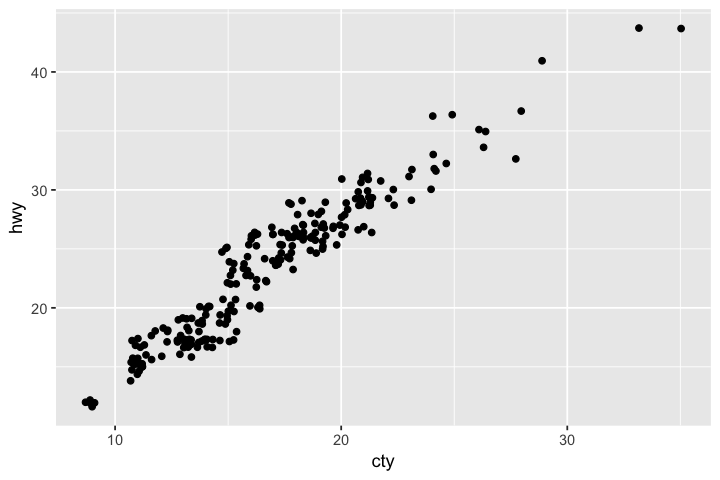

In [69]:
# definitely the case
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point(position="jitter")

## Coordinate systems

```{r}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

Default coordinate system is Cartesian.

 * `coord_flip()` switches x and y axes.
 * `coord_quickmap()` sets aspect ratio for maps.
 * `coord_polar()` sets polar coordinates.

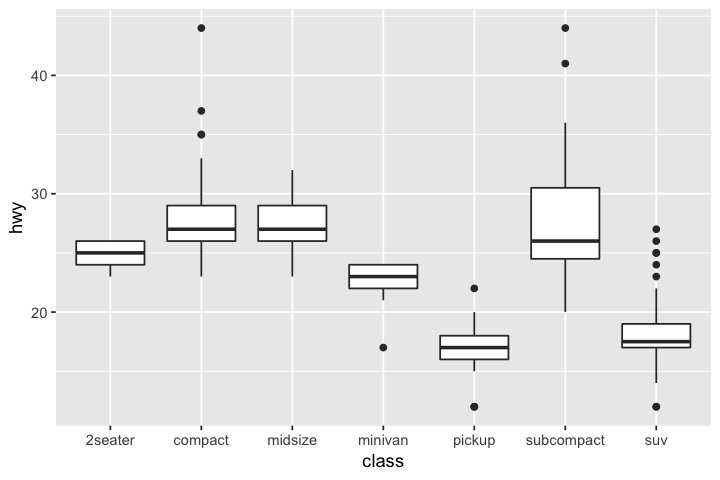

In [70]:
p <- ggplot(data = mpg, mapping = aes(x = class, y = hwy))
p + geom_boxplot()

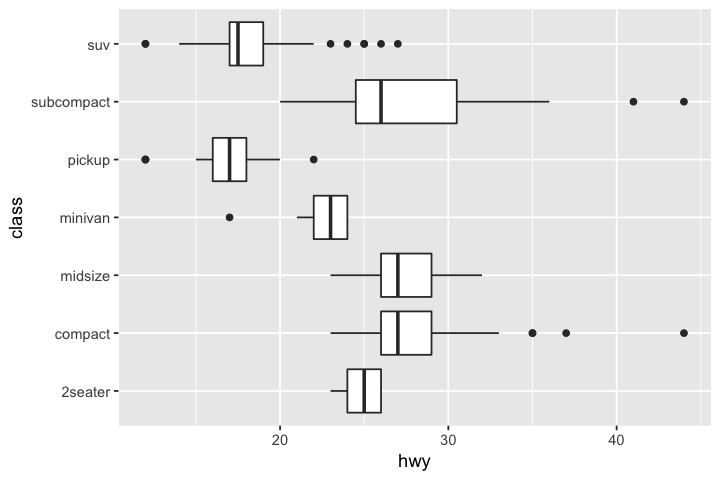

In [71]:
# flipping coordinates
p + geom_boxplot() + coord_flip()

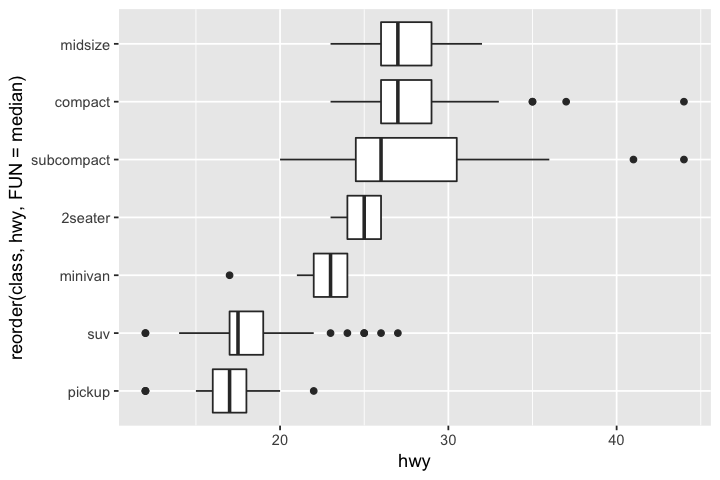

In [72]:
# can reorder x axis by lowest to highest median hwy mileage
# allows easier comparisons
ggplot(data = mpg, mapping = aes(x = reorder(class,hwy,FUN=median), y = hwy)) + 
  geom_boxplot() +
  coord_flip()


Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map



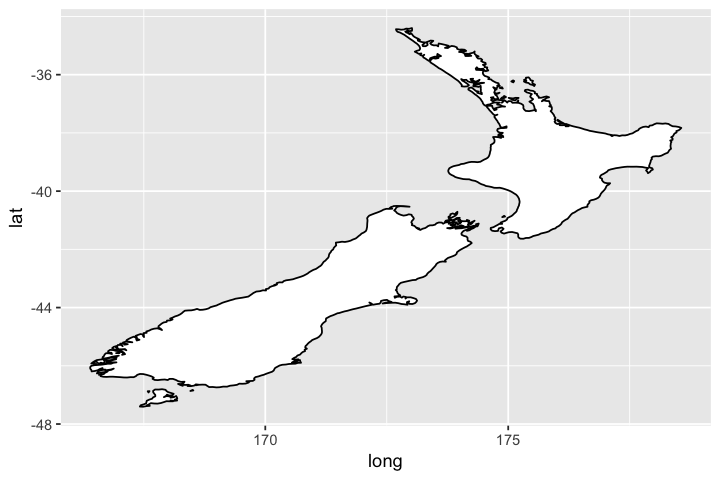

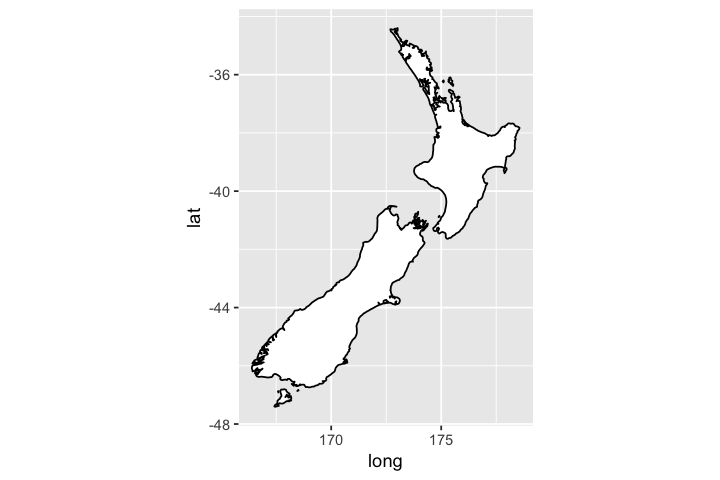

In [73]:
# Setting aspect ratio correctly
nz <- map_data("nz")

ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black")

ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black") +
  coord_quickmap()

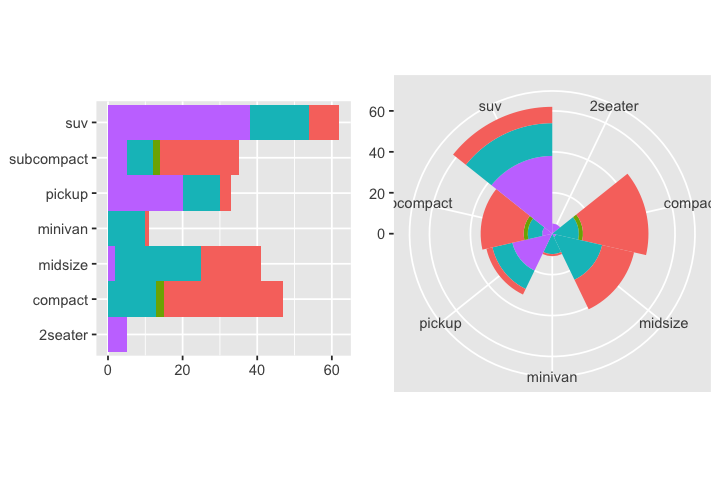

In [74]:
# polar coordinates
bar <- ggplot(data = mpg) + 
  geom_bar(
    mapping = aes(x = class, fill = as.factor(cyl)), 
    show.legend = FALSE,
    width = 1
  ) + 
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

p1 <- bar + coord_flip()
p2 <- bar + coord_polar()
grid.arrange(p1,p2, nrow=1)

# Summary

Now that we've gone through tidying, transforming, and visualizing data let's review all of the different functions we've used and in some cases learned the inner workings of:

## Tidying

 * `gather()`
 * `spread()`
 * `separate()`
 * `unite()`
 * `%>%` propagates the output from a function as input to another. eg: x %>% f(y) becomes f(x,y), and x %>% f(y) %>% g(z) becomes g(f(x,y),z).
 
## Transforming

 * `filter()` to pick observations (rows) by their values
 * `arrange()` to reorder rows, default is by ascending value
 * `select()` to pick variables (columns) by their names
 * `mutate()` to create new variables with functions of existing variables
 * `summarise()` to collapes many values down to a single summary
 * `group_by()` to set up functions to operate on groups rather than the whole data set
 
## Visualizing

 * `ggplot` - global data and mappings
 * `geom_point` - geom for scatterplots
 * `geom_smooth` - geom for regressions
 * `geom_pointrange` - geom for vertical intervals defined by `x`, `y`, `ymin`, and `ymax`
 * `geom_bar` - geom for barcharts
 * `geom_boxplot` - geom for boxplots
 * `geom_polygon` - geom for polygons
 * `aes(color)` - color mapping
 * `aes(shape)` - shape mapping
 * `aes(size)` - size mapping
 * `aes(alpha)` - transparency mapping
 * `as.factor()` - transforming numerical values to categorical values with levels
 * `facet_grid`
 * `facet_wrap`
 * `stat_count` - default stat for barcharts, bins by x and counts
 * `stat_identity` - default stat for scatterplots, leaves data as is
 * `stat_summary` - default stat for pointrange, by default computes mean and se of y by x
 * `position="identity"`
 * `position="stacked"`
 * `position="fill"`
 * `position="dodge"`
 * `position="jitter"`
 * `coord_flip`
 * `coord_map`
 * `coord_polar`

# Publication Quality Graphs

Last piece with some additional functions to learn...

## Labels

`labs()` to add most kinds of labels: title, subtitle, captions, x-axis, y-axis, legend, etc.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


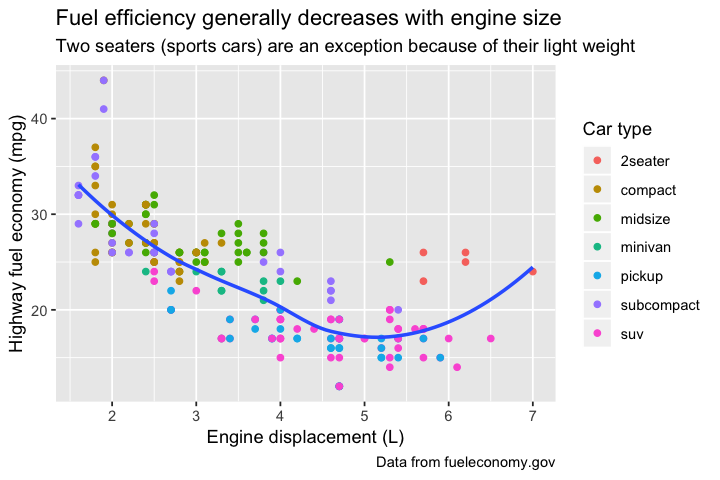

In [75]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(
    title = "Fuel efficiency generally decreases with engine size",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

## Annotations

Can use `geom_text()` to add text labesls on the plot.

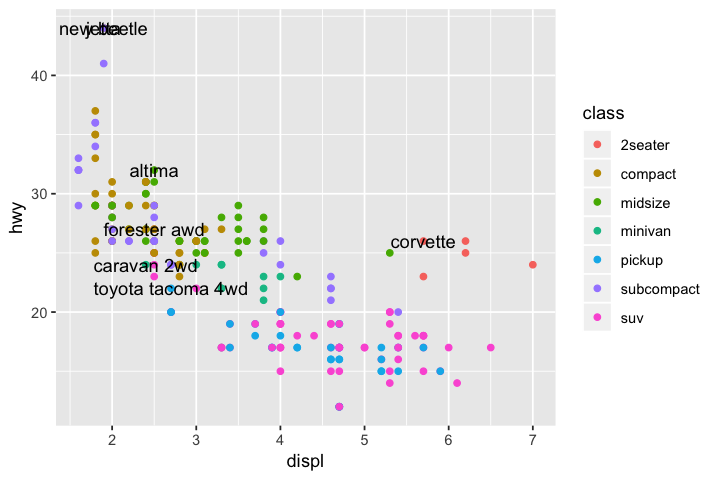

In [76]:
best_in_class <- mpg %>%
  group_by(class) %>%
  filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_text(aes(label = model), data = best_in_class)

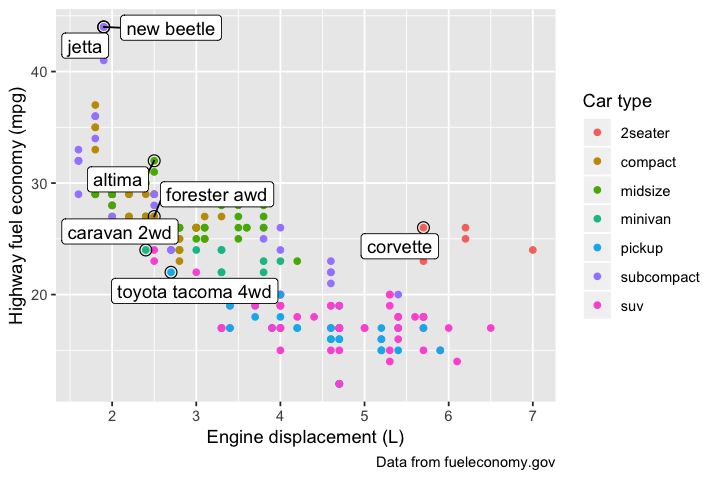

In [77]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_point(size = 3, shape = 1, data = best_in_class) +
  ggrepel::geom_label_repel(aes(label = model), data = best_in_class) +
  labs(
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

## Scales

 * `breaks`: For the position of ticks
 * `labels`: For the text label associated with each tick.
 * Default scale is x continuous, y continuous but can also do x logarithmic, y logarithmic, change color scales.

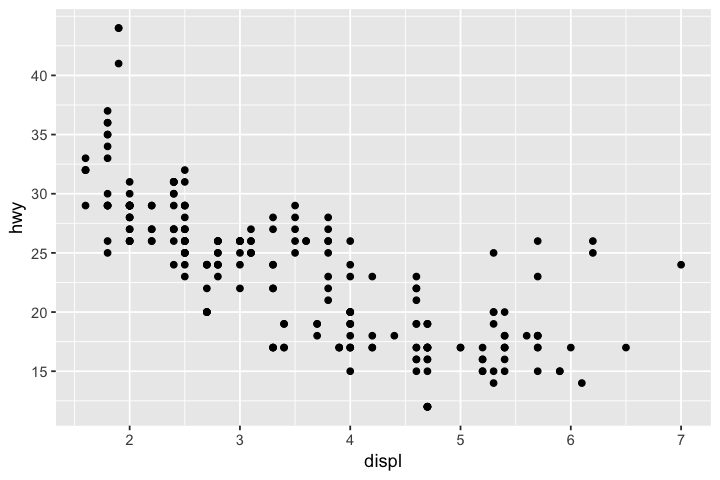

In [78]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_y_continuous(breaks = seq(15, 40, by = 5))

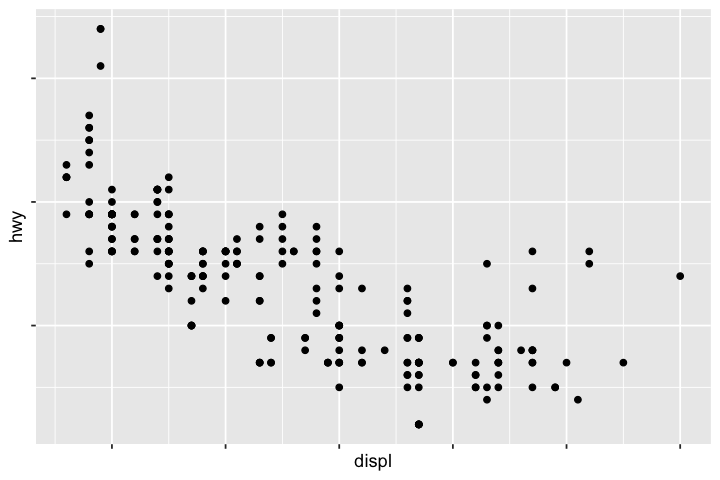

In [79]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_x_continuous(labels = NULL) +
  scale_y_continuous(labels = NULL)

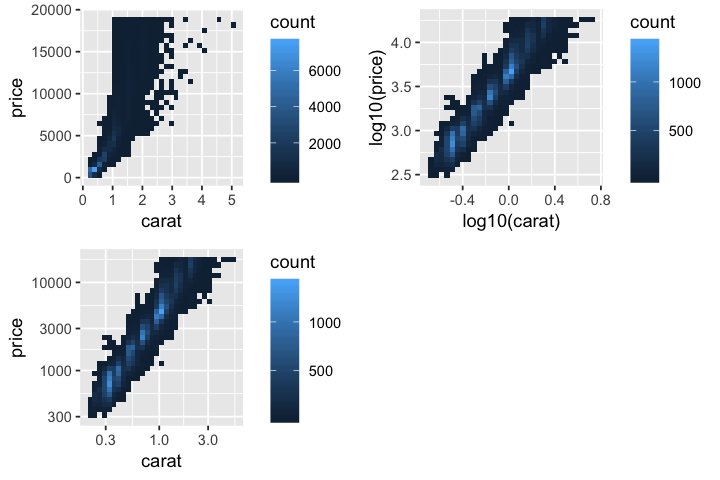

In [80]:
p1 <- ggplot(diamonds, aes(carat, price)) +
  geom_bin2d()

p2 <- ggplot(diamonds, aes(log10(carat), log10(price))) +
  geom_bin2d()

p3 <- ggplot(diamonds, aes(carat, price)) +
  geom_bin2d() + 
  scale_x_log10() + 
  scale_y_log10()

grid.arrange(p1,p2,p3,nrow=2)

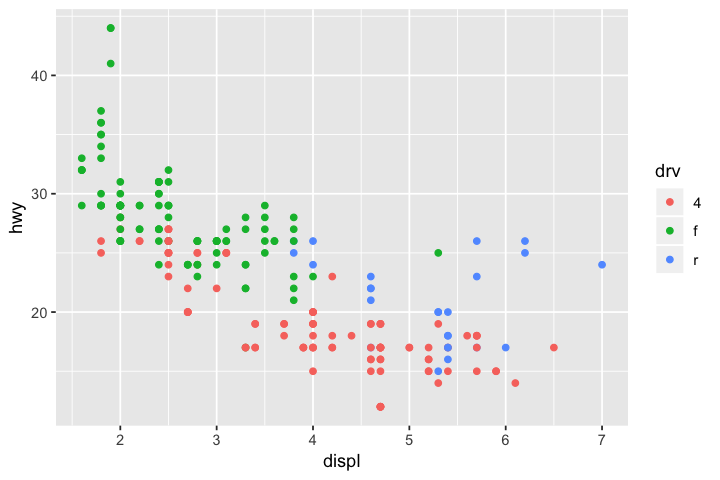

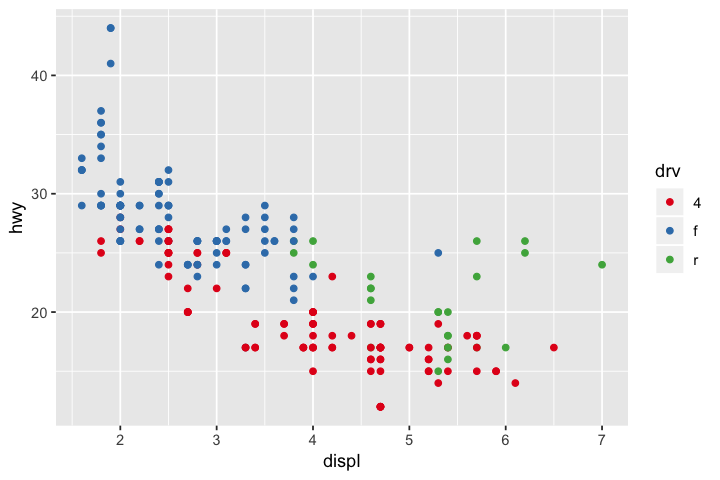

In [81]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv))

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_brewer(palette = "Set1")

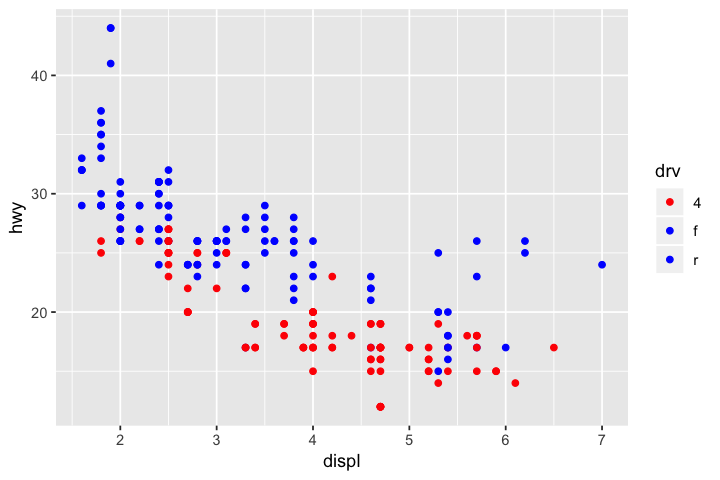

In [82]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_manual(values=c(`4`="red",f="blue",r="blue"))

## Legend positioning

`theme(legend.position)` to control legend position. `guides()` with `guide_legened()` or `guide_colourbar()` for legend display.

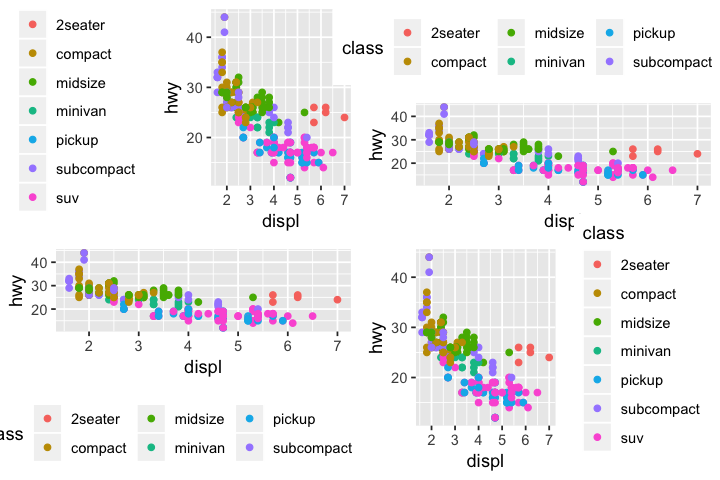

In [83]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class))

p1 <- base + theme(legend.position = "left")
p2 <- base + theme(legend.position = "top")
p3 <- base + theme(legend.position = "bottom")
p4 <- base + theme(legend.position = "right")

grid.arrange(p1,p2,p3,p4, nrow=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


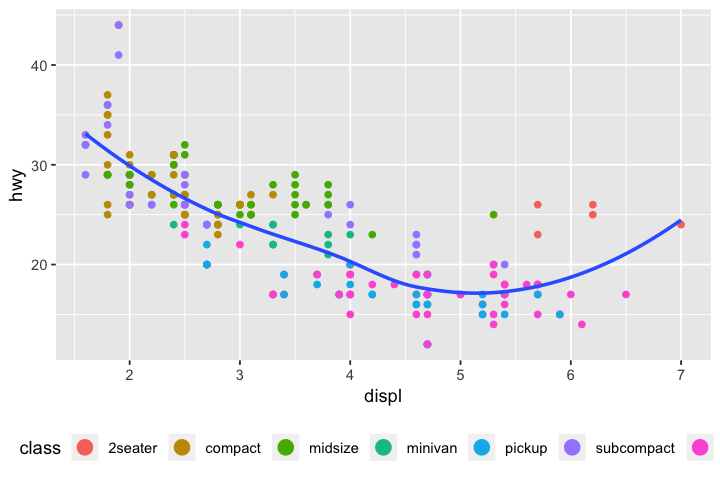

In [84]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  theme(legend.position = "bottom") +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 4)))

## Zooming

Three ways to control plot limits:
 * Adjusting what data are plotted
 * Setting limits in each scale
 * Setting `xlim` and `ylim` in `coord_cartesian()`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


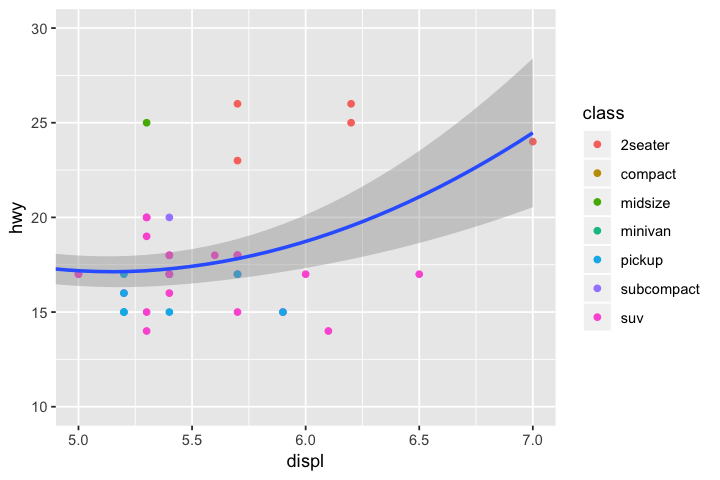

In [85]:
# asetting xlim and ylim in coord_cartesian
ggplot(mpg, mapping = aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth() +
  coord_cartesian(xlim = c(5, 7), ylim = c(10, 30))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


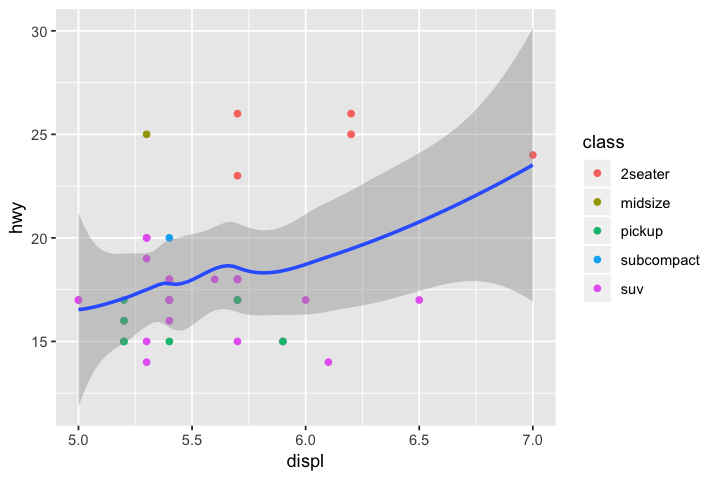

In [86]:
# adjusting what data are plotted
# however geom_smooth will plot regression over subsetted data
filter(mpg, displ >= 5, displ <= 7, hwy >= 10, hwy <= 30) %>%
  ggplot(aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth()

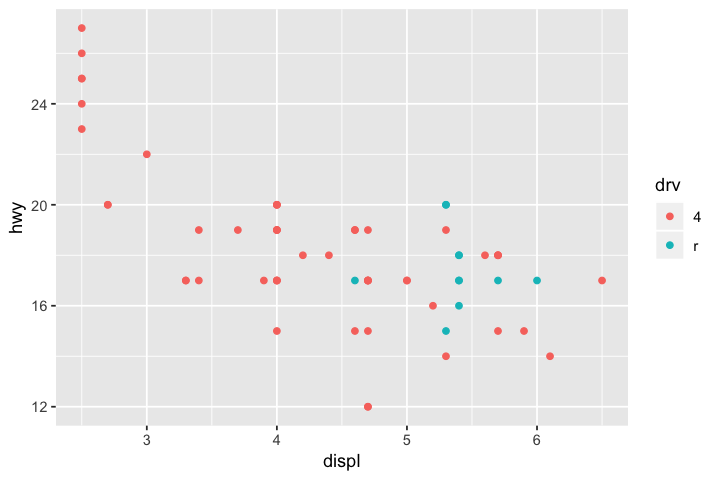

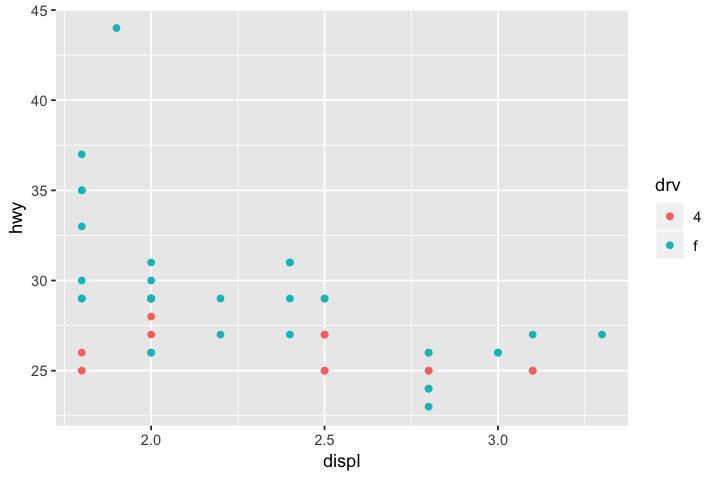

In [87]:
# 2 plots use subsetted data therefore have different scales along hwy and displ
suv <- mpg %>% filter(class == "suv")
compact <- mpg %>% filter(class == "compact")

ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point()

ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point()

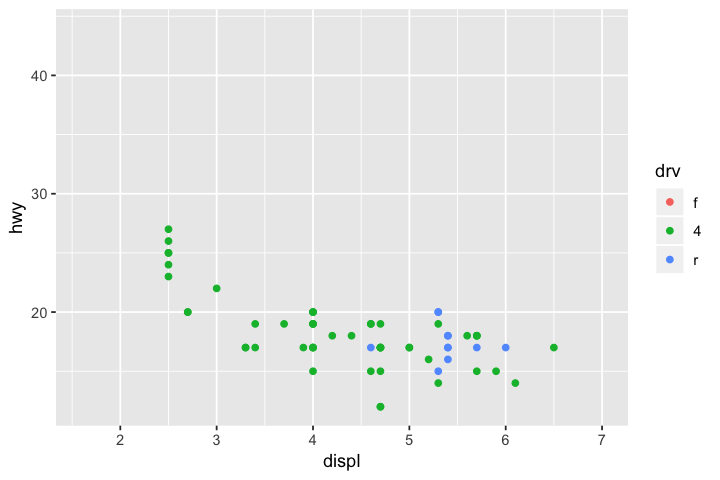

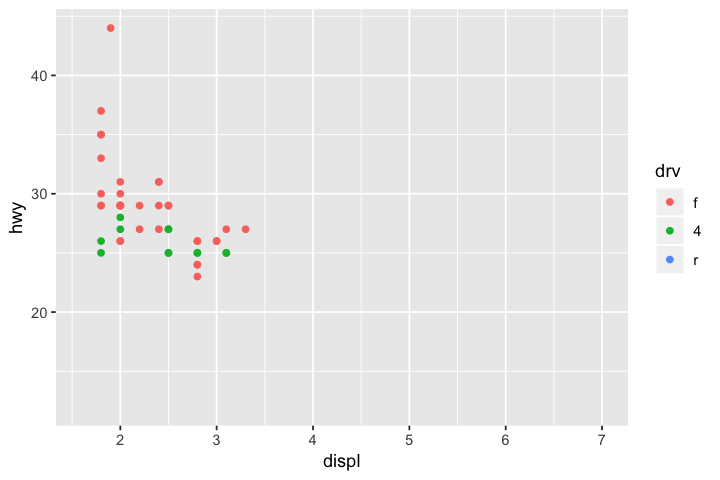

In [88]:
# can set limits in each scale
x_scale <- scale_x_continuous(limits = range(mpg$displ))
y_scale <- scale_y_continuous(limits = range(mpg$hwy))
col_scale <- scale_colour_discrete(limits = unique(mpg$drv))

ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

## Themes

**ggplot2** has 8 themes by default, can get more in other packages like **ggthemes**. Generally prefer `theme_classic()`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


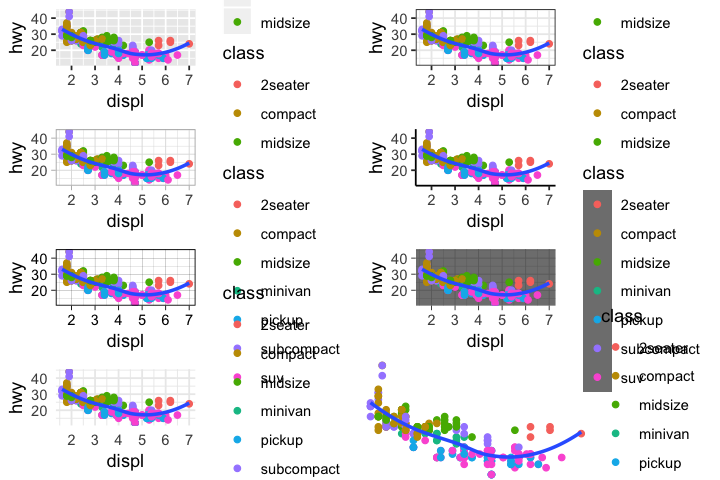

In [89]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE)

p1 <- base + theme_bw()
p2 <- base + theme_light()
p3 <- base + theme_classic()
p4 <- base + theme_linedraw()
p5 <- base + theme_dark()
p6 <- base + theme_minimal()
p7 <- base + theme_void()

grid.arrange(base,p1,p2,p3,p4,p5,p6,p7,nrow=4)

## Saving your plots

 * `ggsave()` will save most recent plot to disk
 * `tiff()` will save next plot to disk
 * Other functions like `postscript()` for eps files, etc.
 * All can take `width`, `height`, `fonts`, `pointsize`, `res` (resolution) arguments

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


pdf 
  2

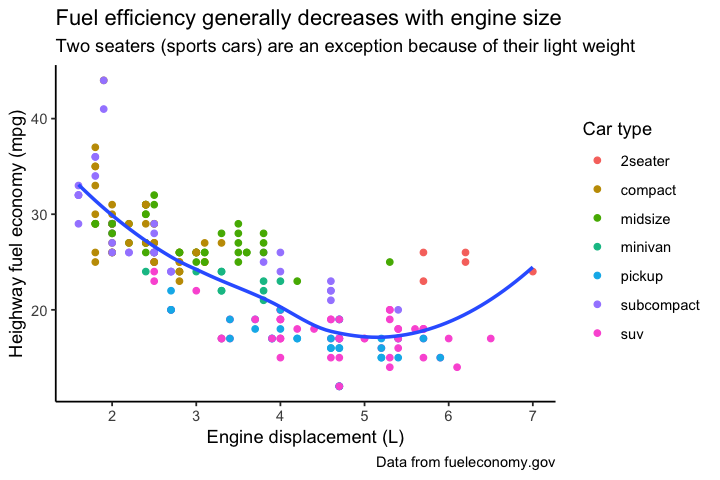

In [90]:
p1 <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(x="Engine displacement (L)",y="Heighway fuel economy (mpg)",
    title = "Fuel efficiency generally decreases with engine size",
    caption = "Data from fueleconomy.gov",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    colour = "Car type"
  ) + x_scale + y_scale + theme_classic()
p1
ggsave("my_plot.pdf")

tiff("my_plot.tiff",width=7,height=5,units="in",pointsize=8,res=350)
p1
dev.off()

# Some other useful visualization packages

We don't have time in this workshop to get in depth to other workshops, but here are some more useful visualization packages that may be helpful for your research.

## ggtree for phylogenetics

Resources and associated packages:
 * [Data Integration, Manipulation and Visualization of Phylogenetic Trees](https://yulab-smu.github.io/treedata-book/index.html)
 * [treeio](https://bioconductor.org/packages/release/bioc/html/treeio.html)
 * [tidytree](https://cran.r-project.org/web/packages/tidytree/index.html)
 
## cowplot

Meant to provide publication-ready theme for **gplot2** that requires minimum amount of fiddling with sizes of axis labels, plot backgrounds, etc. Auto-sets `theme_classic()` for all plots.

## Gviz for plotting data along genomic coordinates

Can be installed from [Bioconductor](https://bioconductor.org/packages/release/bioc/html/Gviz.html).

## phyloseq for metagenomics

Website is [very comprehensive](http://joey711.github.io/phyloseq/).

In [91]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.14.3

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] maps_3.3.0      ggrepel_0.8.0   gridExtra_2.3   forcats_0.4.0  
 [5] stringr_1.4.0   dplyr_0.8.0.1   purrr_0.3.0     readr_1.3.1    
 [9] tidyr_0.8.2     tibble_2.0.1    ggplot2_3.1.0   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3       tidyselect_0.2.5   repr_0.19.2        reshape2_1.4.3    
 [5] haven_2.1.0        lattice_0.20-38    colorspace_1.4-0   generics_0.0.2    
 [9] htmltools_0.3.6    base64enc_0.1-3    rlang_0.3.1        pillar_1.3.1      
[13] glue_